In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append("..")

In [2]:
from utils.helper import get_fmri
from utils.visualize_fmri import plot_voxel_response
import matplotlib.pyplot as plt
import numpy as np

In [18]:
all_subjects = ['sub01', 'sub02', 'sub03', 'sub04', 'sub05',
                'sub06', 'sub07', 'sub08', 'sub09', 'sub10']

all_rois = ['LOC', 'FFA', 'STS', 'EBA', 'PPA',
            'V1', 'V2', 'V3', 'V4', 'WB']

# How many voxels are there per region/subject?

In [28]:
import pandas as pd
roi_voxels = {}
for roi in all_rois:
    sub_voxels = []
    for sub in all_subjects:
        roi_sub = get_fmri('../data/participants_data_v2021', sub, roi, mean=False)
        voxels = roi_sub.shape[2]
        sub_voxels.append(voxels)
    roi_voxels[roi] = sub_voxels
roi_voxels = pd.DataFrame(roi_voxels)
roi_voxels

,LOC,FFA,STS,EBA,PPA,V1,V2,V3,V4,WB
0,1843,68,341,351,425,232,231,261,107,18222
1,1348,157,421,183,153,285,231,270,95,21573
2,1237,80,278,376,368,164,271,270,111,15225
3,1153,210,398,368,225,176,209,212,117,19445
4,1397,69,219,309,210,326,196,176,73,13340
5,1356,119,173,308,216,286,281,229,108,19818
6,1117,89,80,101,33,195,189,174,55,10836
7,1244,163,306,55,150,300,238,223,85,12347
8,1515,76,346,191,262,271,265,245,94,17570
9,1034,69,120,162,165,238,249,188,60,12950


In [41]:
roi_voxels.sum(0)

LOC     13244
FFA      1100
STS      2682
EBA      2404
PPA      2207
V1       2473
V2       2360
V3       2248
V4        905
WB     161326
dtype: int64

<BarContainer object of 10 artists>

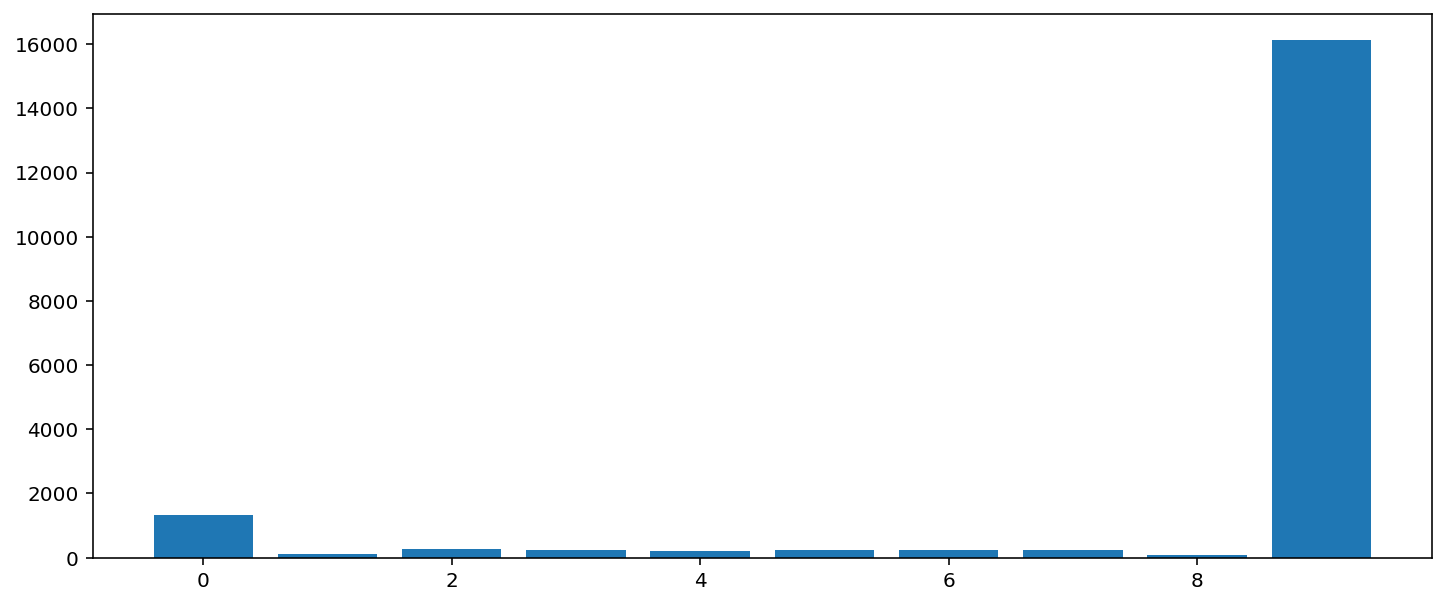

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(np.arange(10), roi_voxels.mean(axis=0))

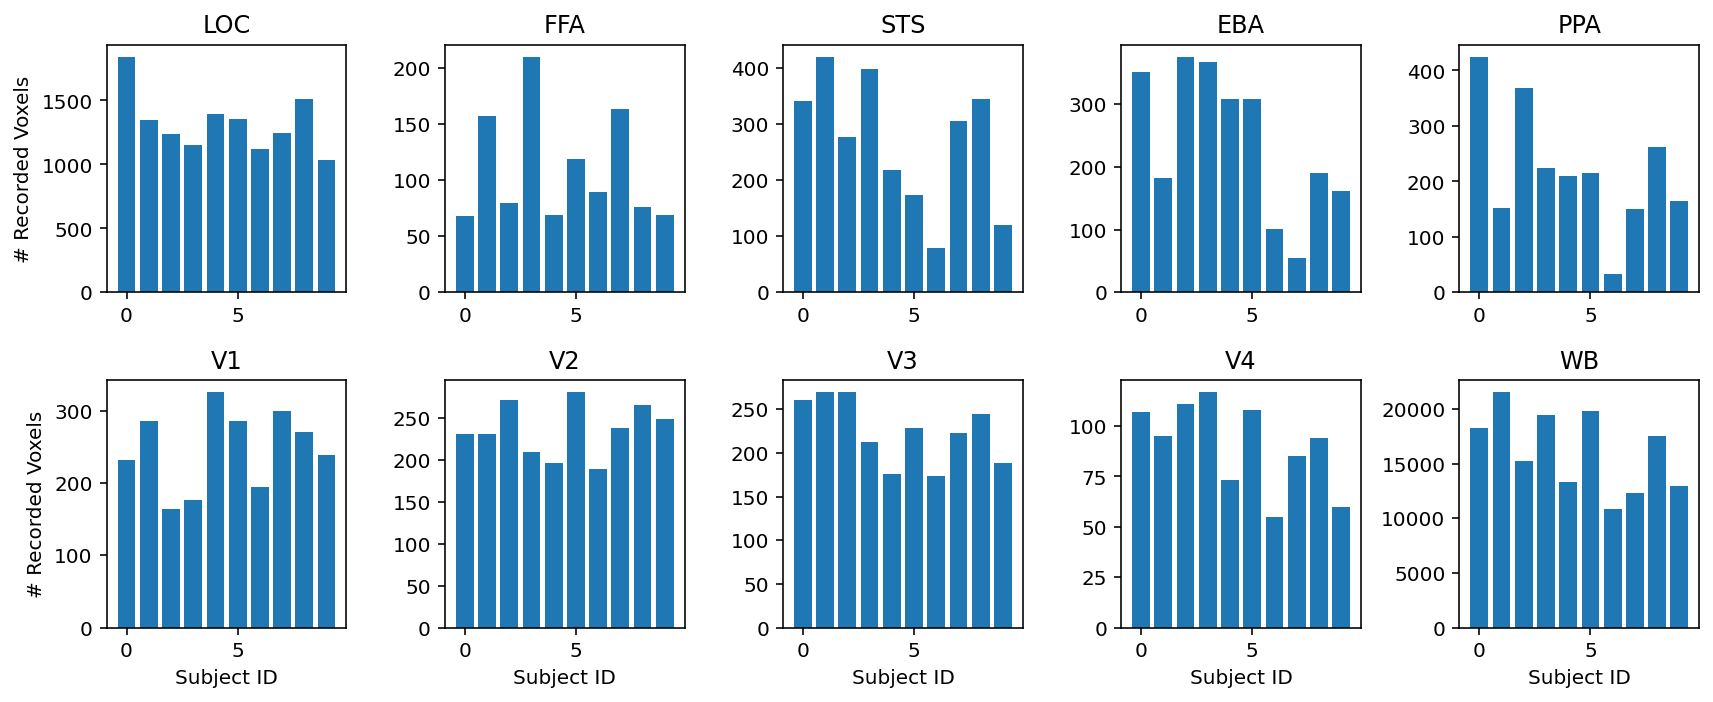

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i, roi in enumerate(all_rois):
    axs.flatten()[i].bar(np.arange(10), roi_voxels[roi])
    axs.flatten()[i].set_title(roi)
    if i == 0 or i == 5:
        axs.flatten()[i].set_ylabel("# Recorded Voxels")
    if i in [5, 6, 7, 8, 9]:
        axs.flatten()[i].set_xlabel("Subject ID")
fig.tight_layout()

# Plot Voxel-Response across Subjects for Same Video

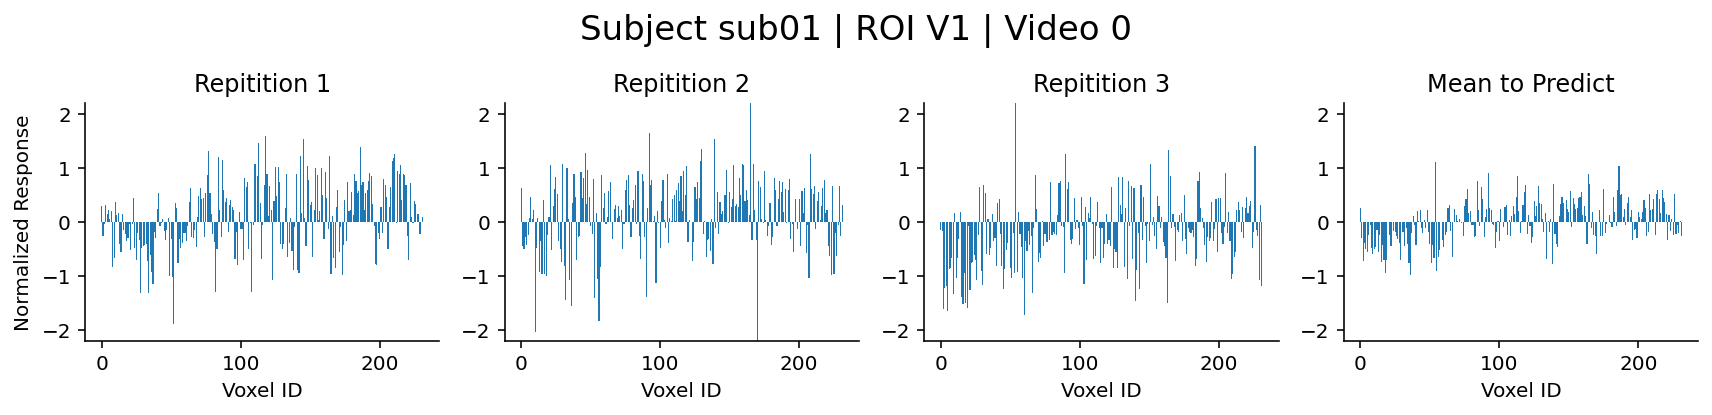

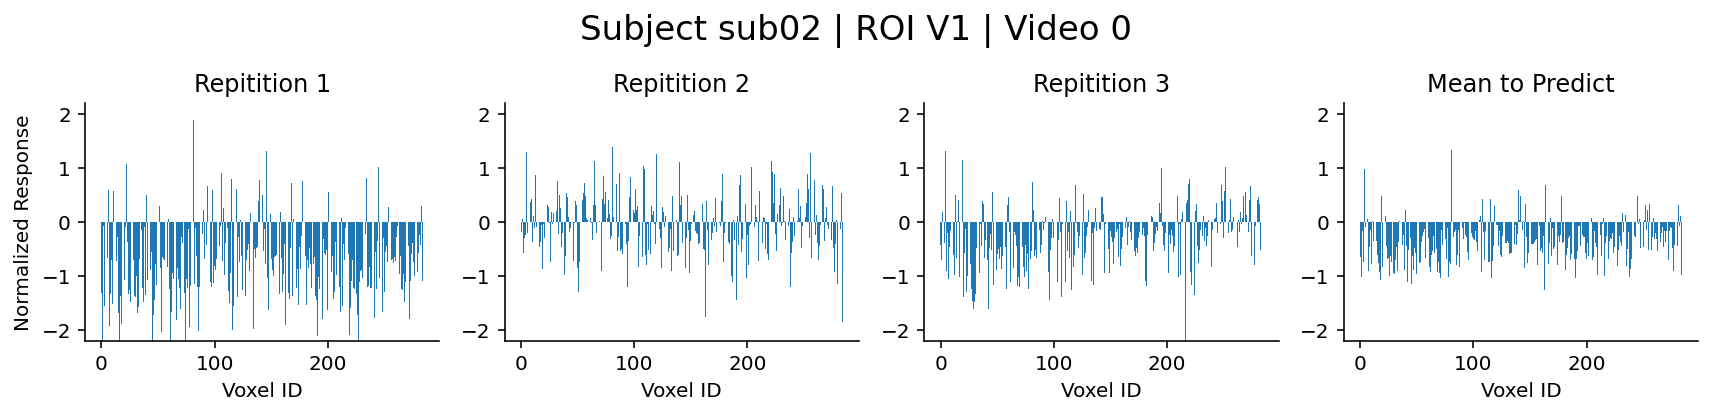

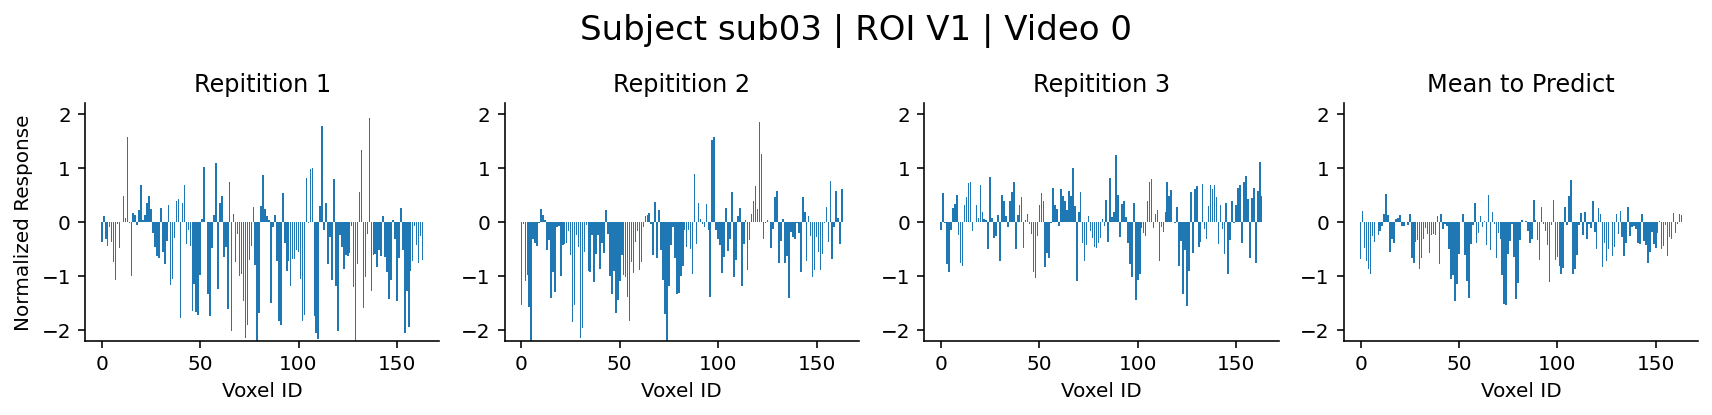

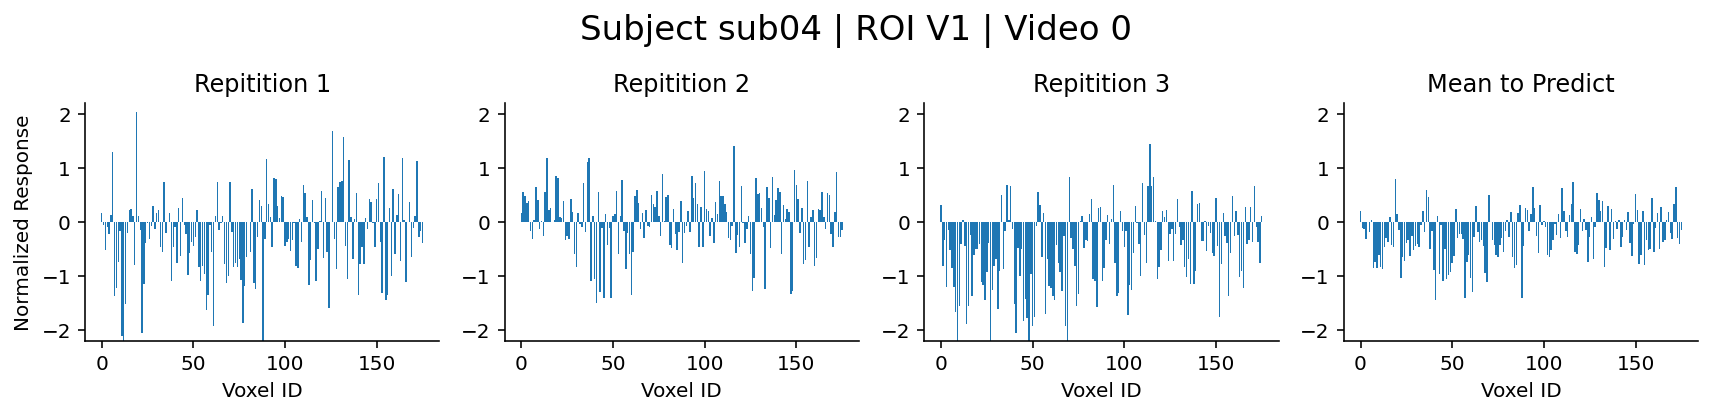

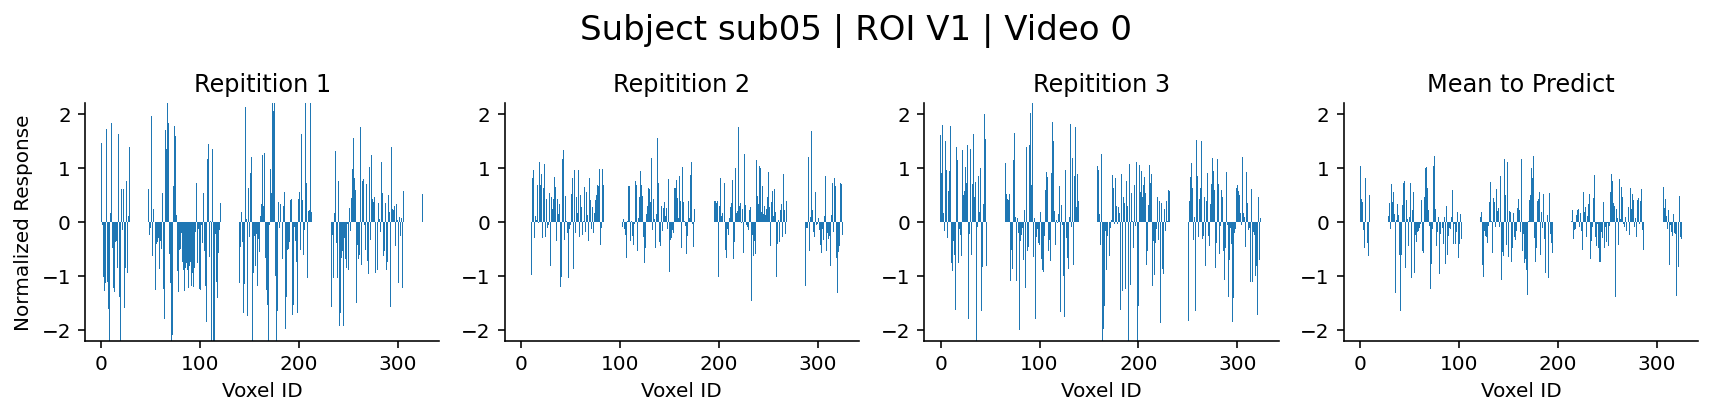

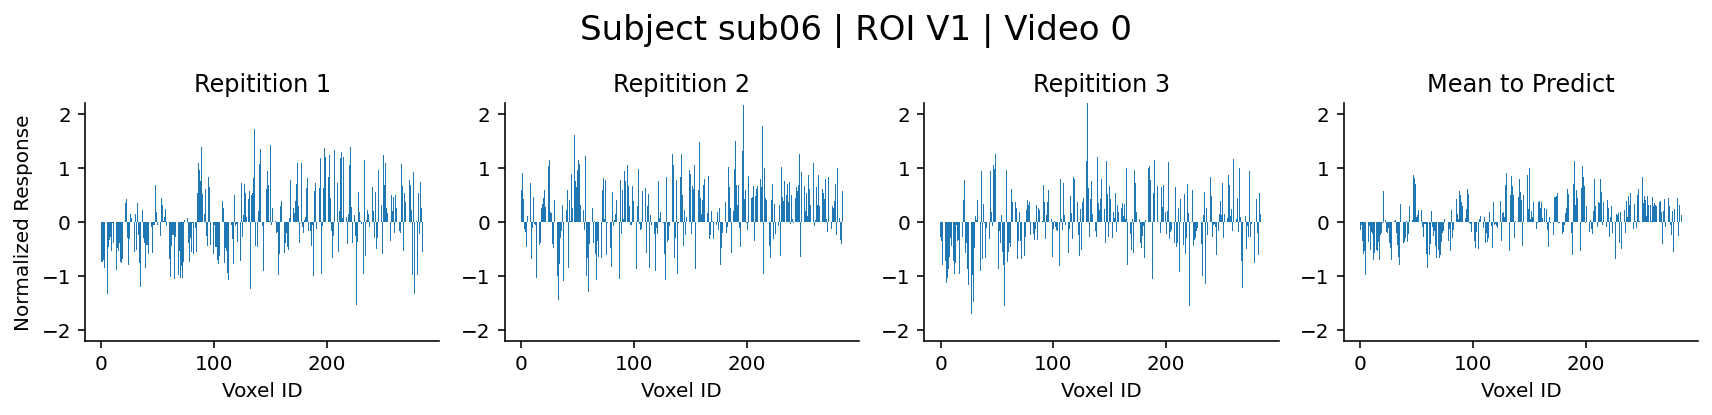

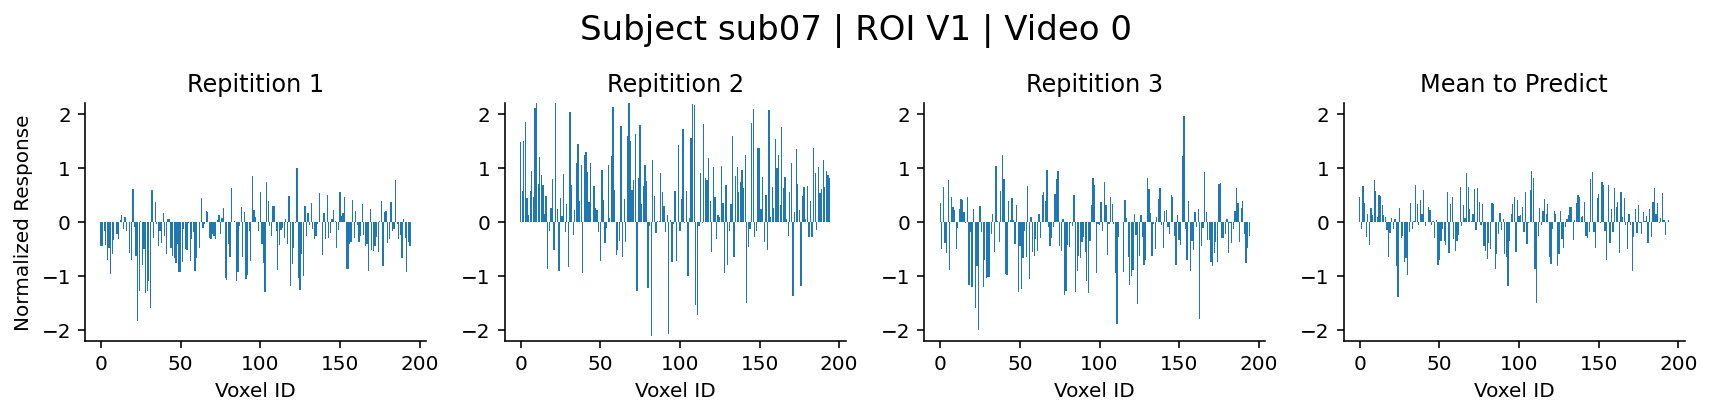

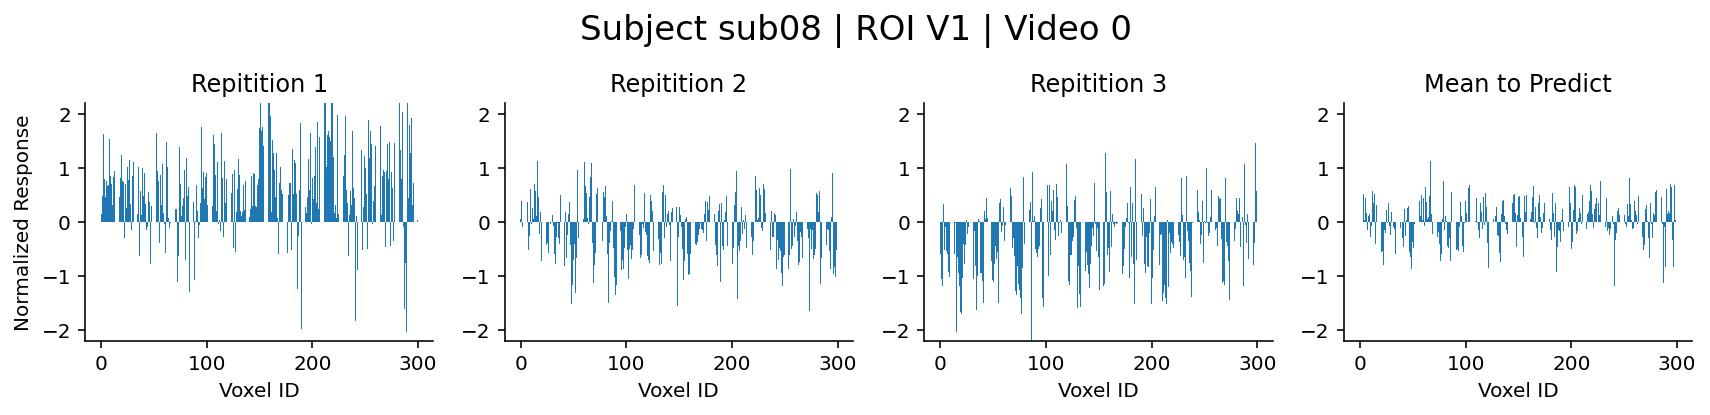

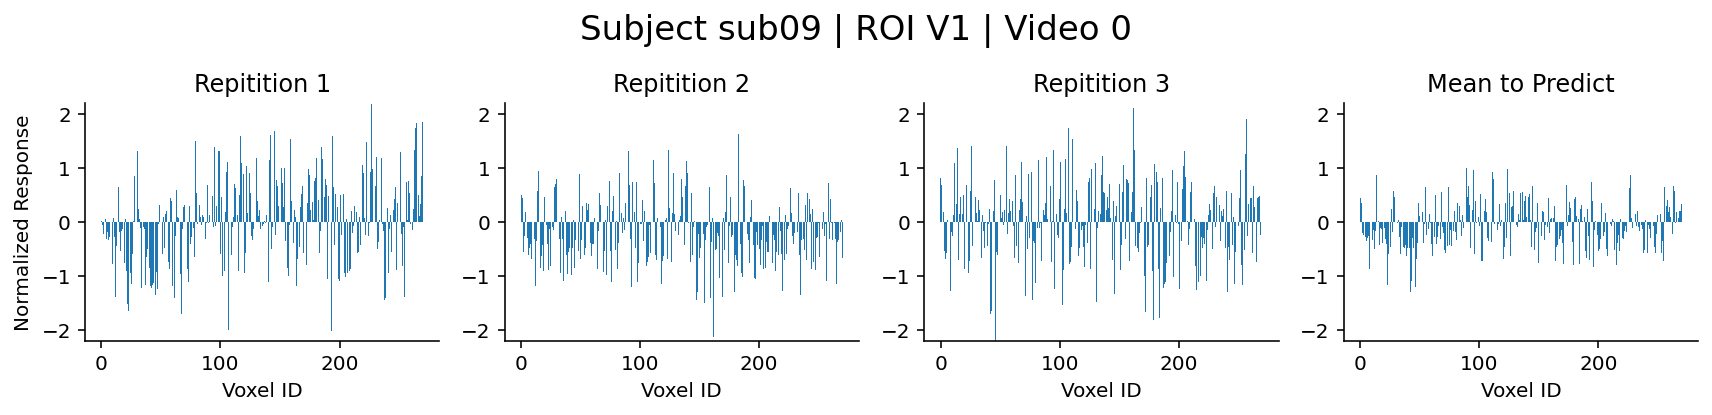

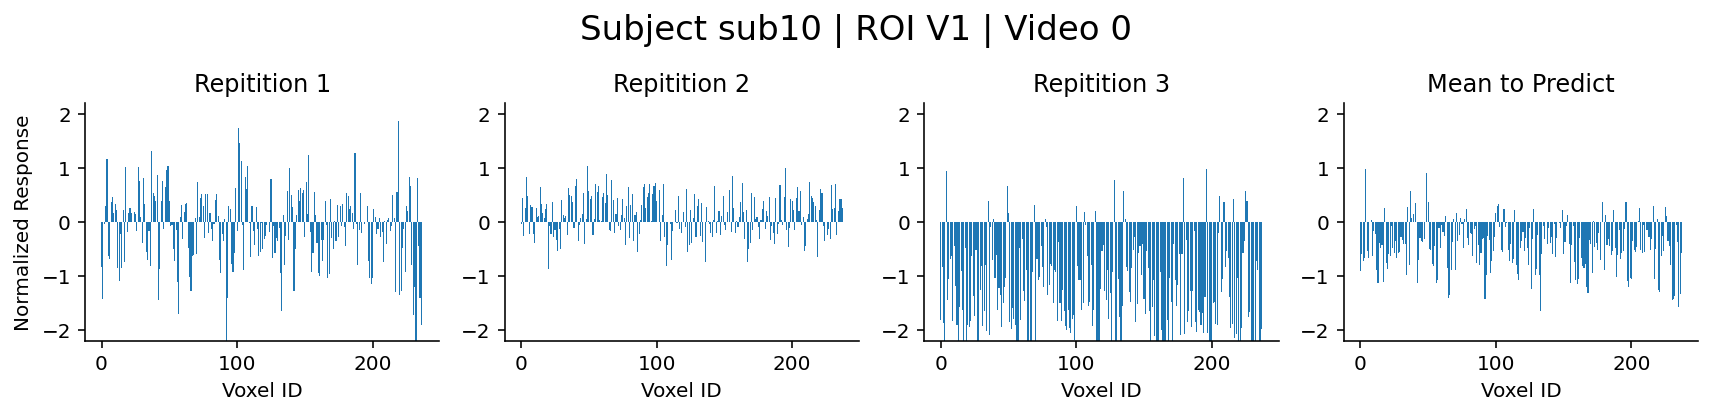

In [9]:
for sub in all_subjects:
    plot_voxel_response(video_id=0, track="mini_track", subject_id=sub, roi='V1')